# SNPE flexible 

In [10]:
import torch
import sbi
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis

Define simulator and prior


In [33]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model
def pend(y, t, params):
    c = params
    theta = y

    dydt = [-c*np.sin(theta)]

    return dydt


true_params = np.array([
    0.25
])
t = np.linspace(0, 10, 101)
y0 = [np.pi]
sol = odeint(pend, y0, t, args=(true_params,))



RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

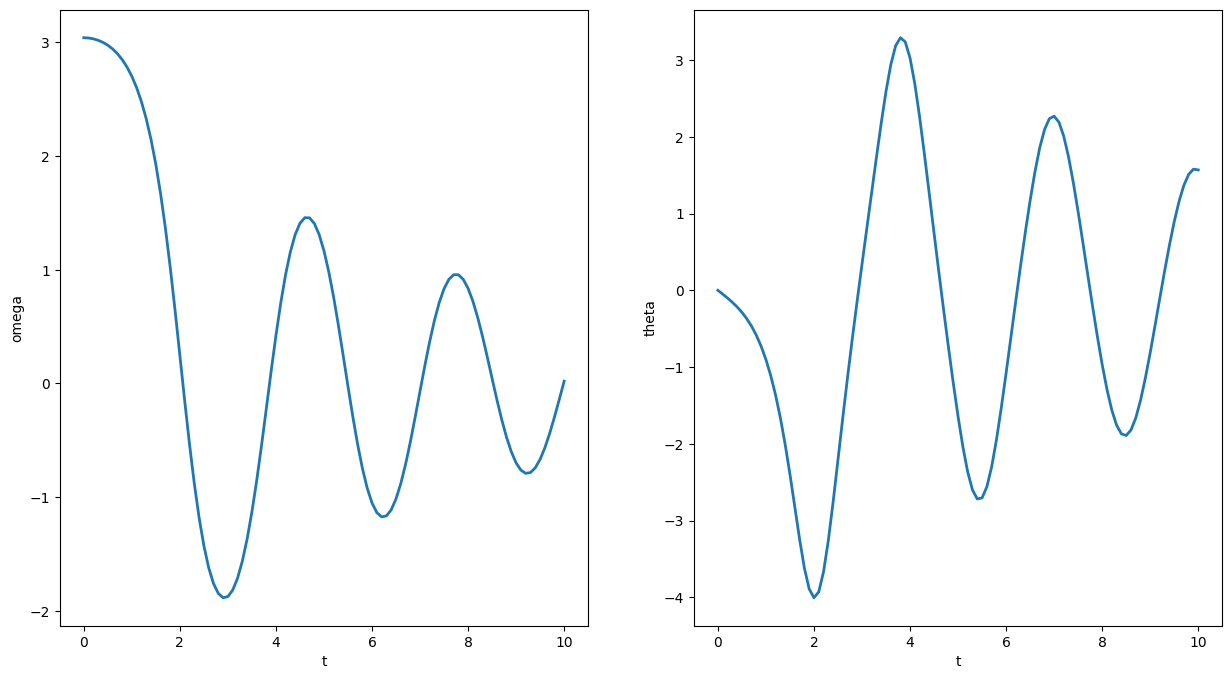

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs = axs.flatten()

variable_labels = ["omega", "theta"]

for i in range(2):
    axs[i].plot(t, true_data[:, i], label='True Data', linewidth=2)
    axs[i].set_xlabel('t')
    axs[i].set_ylabel(variable_labels[i])

In [13]:
import numpy as np
from scipy.integrate import odeint

# Define the differential equation for the simple harmonic oscillator
def harmonic_oscillator(y, t, omega):
    """
    Defines the differential equation for a simple harmonic oscillator.

    Parameters:
        y : array_like
            A 1-D array representing the state of the system, where y[0] is the position and y[1] is the velocity.
        t : float
            The current time.
        omega : float
            The angular frequency of the oscillator.

    Returns:
        dydt : array_like
            A 1-D array representing the derivative of the state variables.
    """
    position, velocity = y
    dydt = [velocity, -omega**2 * position]  # The derivative of position is velocity, and the derivative of velocity is -omega^2 * position
    return dydt

# Set up initial conditions
initial_position = 1.0  # Initial position
initial_velocity = 0.0  # Initial velocity
initial_state = [initial_position, initial_velocity]  # Initial state vector

# Set up time points for integration
t = np.linspace(0, 10, 1000)  # Time points from 0 to 10 with 1000 steps

# Set up parameters
omega = 1.0  # Angular frequency

# Integrate the differential equation using odeint
def model(omega):
    trajectory = odeint(harmonic_oscillator, initial_state, t, args=(omega,))
    return trajectory

# Output the trajectory
print(trajectory)


[[ 1.          0.        ]
 [ 0.9999499  -0.01000983]
 [ 0.99979961 -0.02001867]
 ...
 [-0.8497942   0.5271149 ]
 [-0.84447529  0.5355948 ]
 [-0.83907176  0.54402103]]


In [15]:
num_dim = 1
prior = utils.BoxUniform(low=-6 * torch.ones(num_dim), high=6 * torch.ones(num_dim))

In [16]:
simulator, prior = prepare_for_sbi(model, prior)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
inference = SNPE(prior=prior)

In [2]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis

In [6]:
#Try with gaussian only

# Define a simple toy model with multiple dimensions
def model(theta):
    """
    Toy model to generate synthetic data.

    Parameters:
        theta : torch.Tensor
            Model parameters.

    Returns:
        torch.Tensor
            Synthetic data generated from the model.
    """
    mean = theta[0]  # Mean of the Gaussian
    std = theta[1]   # Standard deviation of the Gaussian
    size = theta[2]  # Number of data points
    inp = torch.tensor([mean, std, size])
    # Generate synthetic data from a Gaussian distribution
    data = torch.normal(inp)

    return data

# Define the prior distribution for the parameters
prior = utils.BoxUniform(low=torch.tensor([0, 0, 10]), high=torch.tensor([10, 10, 100]))

# Generate synthetic observations from the model
true_theta = torch.tensor([5, 2, 100])  # True parameters of the model
true_data = model(true_theta)

# Instantiate the simulator
simulator = model

simulator, prior = prepare_for_sbi(simulator, prior)
# Instantiate the SNPE algorithm
inference = SNPE(prior=prior)

# Train the SNPE algorithm using the observed data
num_rounds = 3
proposal = prior  # Use the prior as the initial proposal distribution
density_estimator = inference.train(true_data, num_rounds=num_rounds, proposal=proposal)

# Sample from the learned posterior distribution
num_samples = 1000
posterior_samples = density_estimator.sample((num_samples,), x=true_data)

# Plot the posterior samples
plot.pairplot(posterior_samples, limits=[[0, 10], [0, 10], [10, 100]], fig_size=(5, 5), points=true_theta)
plt.show()


RuntimeError: "normal_kernel_cpu" not implemented for 'Long'

In [44]:
model(torch.tensor([0,1,100]))

tensor([ 1.0809,  0.1589, -1.9171,  0.3398,  1.6811, -0.6363, -1.1786,  1.2702,
        -2.0141, -0.7420, -1.2299, -0.8804,  2.5835,  0.8635, -1.0570,  0.7734,
         1.1350, -0.0248, -0.2702, -0.4423,  2.2845, -1.0506, -0.1045,  0.2635,
         0.0891,  1.7169,  0.2132, -0.3251,  1.0878, -1.3521, -1.7821, -0.9602,
         0.3857,  1.8087, -0.6221,  0.0596, -1.3051, -0.1658,  0.8044, -0.5675,
        -0.3641,  0.0212,  1.5292,  0.2402, -0.3797, -0.2645, -0.6889, -1.2556,
         0.8476, -0.0252,  1.2496,  0.9030, -0.5241, -0.9811, -0.1458, -2.5323,
        -0.2561, -0.4599, -1.5657, -0.2054, -0.9414,  0.0715, -0.9947,  0.0546,
         0.0528,  1.2854, -1.0704,  0.6022, -0.3384,  2.8329, -1.0307,  0.1290,
        -0.2705, -0.2929,  1.7882, -0.1180, -0.0520,  0.2447, -0.4793,  1.4123,
        -0.5597, -0.6598, -0.8915,  0.7363,  0.0405,  1.5667, -0.1074, -0.4842,
        -0.6676,  0.5624, -0.9963,  0.3137,  0.1752,  0.2543, -1.1353,  0.6196,
        -1.1195, -1.2170, -0.8350, -0.13

Start with SNPE

In [16]:
simulator, prior = prepare_for_sbi(ode_solver, prior)

In [17]:
#Instantiate the inference object:
inference = SNPE(prior=prior)

In [19]:
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=200)

Running 200 simulations.:   0%|          | 0/200 [00:00<?, ?it/s]

In [20]:
inference = inference.append_simulations(theta, x)

In [21]:
inference

In [22]:
x_o = torch.tensor(true_data)
x_o


tensor([[ 3.0416,  0.0000],
        [ 3.0391, -0.0497],
        [ 3.0316, -0.1006],
        [ 3.0189, -0.1553],
        [ 3.0003, -0.2162],
        [ 2.9753, -0.2862],
        [ 2.9427, -0.3685],
        [ 2.9011, -0.4667],
        [ 2.8487, -0.5849],
        [ 2.7833, -0.7279],
        [ 2.7021, -0.9011],
        [ 2.6019, -1.1103],
        [ 2.4787, -1.3613],
        [ 2.3281, -1.6589],
        [ 2.1453, -2.0050],
        [ 1.9256, -2.3954],
        [ 1.6652, -2.8160],
        [ 1.3623, -3.2376],
        [ 1.0191, -3.6145],
        [ 0.6429, -3.8883],
        [ 0.2468, -4.0034],
        [-0.1514, -3.9273],
        [-0.5324, -3.6643],
        [-0.8793, -3.2536],
        [-1.1801, -2.7504],
        [-1.4281, -2.2067],
        [-1.6213, -1.6596],
        [-1.7606, -1.1291],
        [-1.8479, -0.6214],
        [-1.8855, -0.1344],
        [-1.8752,  0.3387],
        [-1.8180,  0.8049],
        [-1.7143,  1.2688],
        [-1.5644,  1.7296],
        [-1.3688,  2.1774],
        [-1.1300,  2

In [23]:
density_estimator = inference.train()

Neural network successfully converged after 227 epochs.


In [24]:

posterior = inference.build_posterior(density_estimator)

In [25]:
posterior_samples = posterior.sample((10000,), x=x_o)

ValueError: The `x` passed to condition the posterior for evaluation or sampling
                has an inferred batch shape larger than one. This is not supported in
                some sbi methods for reasons depending on the scenario:

                    - in case you want to evaluate or sample conditioned on several xs
                    e.g., (p(theta | [x1, x2, x3])), this is not supported yet except
                    when using likelihood based SNLE and SNRE.

                    - in case you trained with a single round to do amortized inference
                    and now you want to evaluate or sample a given theta conditioned on
                    several xs, one after the other, e.g, p(theta | x1), p(theta | x2),
                    p(theta| x3): this broadcasting across xs is not supported in sbi.
                    Instead, what you can do it to call posterior.log_prob(theta, xi)
                    multiple times with different xi.

                    - finally, if your observation is multidimensional, e.g., an image,
                    make sure to pass it with a leading batch dimension, e.g., with
                    shape (1, xdim1, xdim2). Beware that the current implementation
                    of sbi might not provide stable support for this and result in
                    shape mismatches.

            NOTE: below we use list notation to reduce clutter, but `x` should be of 
            type torch.Tensor or ndarray.

            For example:

            > x_o = [[1]]
            > x_o = [[1, 2, 3]]

            are interpreted as single observations with a leading batch dimension of
            one. However

            > x_o = [ [1], [2] ]
            > x_o = [ [1,2,3], [4,5,6] ]

            are interpreted as a batch of two scalar or vector observations, which
            is not supported yet. The following is interpreted as a matrix-shaped
            observation, e.g. a monochromatic image:

            > x_o = [ [[1,2,3], [4,5,6]] ]

            Finally, for convenience,

            > x_o = [1]
            > x_o = [1, 2, 3]

            will be interpreted as a single scalar or single vector observation
            respectively, without the user needing to wrap or unsqueeze them.
            